In [1]:
execution_mode = 'full'

# Neural Network Model

As a third and last model, this chapter describes the implementation of a Neural Network as a classifier. The implementation will be done with the Python Deep Learning library Keras. The structure of the chapter will be the same as for the last two chapters.

## Table of Contents

- [Data Takeover](#Data-Takeover)
- [Neural Network Implementation](#Neural-Network-Implementation)
    - [Train/Test Split](#Train/Test-Split)
    - [Model Training](#Model-Training)
    - [General Observations](#General-Observations)
    - [Performance Measurement](#Performance-Measurement)
- [Summary](#Summary)
    - [Results Handover](#Results-Handover)

## Data Takeover

As the first step, the data from the preceding data preparation chapters have to be read as input for processing in this chapter.

In [2]:
import os
import pandas as pd

path_goldstandard = './daten_goldstandard'

# Restore results so far
df_labelled_feature_matrix = pd.read_pickle(os.path.join(path_goldstandard,
                                                         'labelled_feature_matrix.pkl'),
                                 compression=None)

df_attribute_with_sim_feature = pd.read_pickle(os.path.join(
    path_goldstandard, 'labelled_feature_matrix_full.pkl'), compression=None
                                              )

df_labelled_feature_matrix.describe()

coordinate_E_delta  coordinate_N_delta  corporate_full_delta  \
count       259428.000000       259428.000000         259428.000000   
mean            -0.093981           -0.093706             -0.073730   
std              0.034629            0.039458              0.068515   
min             -0.100000           -0.100000             -0.100000   
25%             -0.100000           -0.100000             -0.100000   
50%             -0.100000           -0.100000             -0.100000   
75%             -0.100000           -0.100000             -0.050000   
max              1.000000            1.000000              1.000000   

           doi_delta  edition_delta  exactDate_delta  format_prefix_delta  \
count  259428.000000  259428.000000    259428.000000        259428.000000   
mean       -0.094367      -0.083342         0.408119             0.419858   
std         0.020354       0.059362         0.151027             0.493536   
min        -0.100000      -0.100000         0.000000             0.000000   
25%        -0.100000      -0.100000         0.250000             0.000000   
50%        -0.100000      -0.100000         0.375000             0.000000   
75%        -0.100000      -0.050000         0.500000             1.000000   
max         1.000000       1.000000         1.000000             1.000000   

       format_postfix_delta     isbn_delta     ismn_delta  ...     part_delta  \
count         259428.000000  259428.000000  259428.000000  ...  259428.000000   
mean               0.430594       0.377985      -0.097881  ...      -0.010449   
std                0.331195       0.484879       0.014649  ...       0.189004   
min                0.000000       0.000000      -0.100000  ...      -0.100000   
25%                0.111111       0.000000      -0.100000  ...      -0.100000   
50%                0.428571       0.000000      -0.100000  ...      -0.050000   
75%                0.428571       1.000000      -0.100000  ...      -0.050000   
max                1.000000       1.000000       1.000000  ...       1.000000   

       person_100_delta  person_700_delta  person_245c_delta  pubinit_delta  \
count     259428.000000     259428.000000      259428.000000  259428.000000   
mean           0.202922          0.175669           0.433444       0.189530   
std            0.362126          0.310734           0.253005       0.293183   
min           -0.100000         -0.100000          -0.100000      -0.100000   
25%           -0.050000         -0.050000           0.437759      -0.050000   
50%           -0.050000         -0.050000           0.523232      -0.050000   
75%            0.535227          0.529091           0.580293       0.492063   
max            1.000000          1.000000           1.000000       1.000000   

         scale_delta  ttlfull_245_delta  ttlfull_246_delta  volumes_delta  \
count  259428.000000      259428.000000      259428.000000  259428.000000   
mean       -0.093731           0.562611          -0.083263       0.207151   
std         0.039375           0.109953           0.070059       0.342940   
min        -0.100000           0.000000          -0.100000      -0.100000   
25%        -0.100000           0.505900          -0.100000      -0.050000   
50%        -0.100000           0.544834          -0.100000       0.000000   
75%        -0.100000           0.599763          -0.100000       0.555556   
max         1.000000           1.000000           1.000000       1.000000   

          duplicates  
count  259428.000000  
mean        0.005678  
std         0.075138  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 21 columns]

In [3]:
print('Part of duplicates (1) on uniques (0) in units of [%]')
print(round(df_labelled_feature_matrix.duplicates.value_counts(normalize=True)*100, 2))

Part of duplicates (1) on uniques (0) in units of [%]
0    99.43
1     0.57
Name: duplicates, dtype: float64


## Neural Network Implementation

The Neural Network implementation to be used will consist of two different architectures. The first architecture will implement a network with one and the second architecture will implement a network with two hidden layers. The accuracy scores of the two architectures will be compared and the best model will be taken to the summary chapter for comparison with the results of the models so far.

### Train/Test Split

The loaded data has to be split into two data subsets, one for training and a smaller one for testing data. The implementation below will use cross-validation. Therefore, a validation data subset will be done by the implementation and is not needed explicitly.

In [4]:
import classifier_fitting_funcs as cff

X_tr, _, X_te, y_tr, _, y_te, idx_tr, _, idx_te = cff.split_feature_target(
    df_labelled_feature_matrix, 'train_test')

X_tr[:5], y_tr[:5], idx_tr[:5]

(array([[-0.1       , -0.1       , -0.05      , -0.1       , -0.1       ,
          0.25      ,  0.        ,  0.42857143,  0.        , -0.1       ,
          0.16666667, -0.1       , -0.05      , -0.05      ,  0.53888889,
          0.47991021, -0.1       ,  0.59978811, -0.1       ,  0.78333333],
        [-0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
          0.4375    ,  0.        ,  0.11111111,  1.        , -0.1       ,
         -0.05      , -0.1       ,  1.        ,  0.57605284,  0.59184563,
          0.41919192, -0.1       ,  0.7332472 , -0.1       ,  0.        ],
        [-0.1       , -0.1       ,  0.05      , -0.1       , -0.1       ,
          0.25      ,  1.        ,  1.        ,  1.        , -0.1       ,
         -0.1       , -0.1       , -0.05      ,  0.52608873,  0.61453149,
          0.41568627, -0.1       ,  0.51855227, -0.1       ,  0.        ],
        [-0.1       , -0.1       , -0.1       , -0.1       , -0.1       ,
          0.5       ,  1.        , 

In [5]:
print(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape)

(207542, 20) (207542,) (51886, 20) (51886,)


### Model Training

For more flexibility in the implementation, a special function has been written that takes the parameter dictionary of the grid space as argument and builds up the layers of the network according to the input. The network architecture can be chosen with a first hidden layer with dropout, an optional second hidden and an output layer. The code of the following function does the construction job and returns the required model to the calling code.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.initializers import VarianceScaling
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

def build_and_compile_nn(params):
    # Input layer
    hidden1 = Dense(
#        12, # Number of units for hidden layer
        params['number_of_hidden1_layers'], # Number of units for hidden layer
        input_shape=(X_tr.shape[1],),
        activation='relu',
        kernel_initializer=VarianceScaling(scale=2.0, seed=0),
        kernel_regularizer=l2(params['l2_alpha']),
        bias_initializer='zeros'
    )

    # With dropout layer
    dropout = Dropout(
        rate=params['dropout_rate'],
        seed=0
    )

    if params['number_of_hidden2_layers'] > 0 :
        hidden2 = Dense(
    #        12, # Number of units for hidden layer
            params['number_of_hidden2_layers'], # Number of units for hidden layer
            input_shape=(params['number_of_hidden1_layers'],),
            activation='relu',
            kernel_initializer=VarianceScaling(scale=2.0, seed=0),
            kernel_regularizer=l2(params['l2_alpha']),
            bias_initializer='zeros'
        )

    # Output layer
    output = Dense(
        2,
    #    activation='sigmoid', # Bring out 0 or 1 values
        activation='softmax', # Bring out 0 or 1 values
        kernel_initializer=VarianceScaling(scale=1, seed=0),
        kernel_regularizer=l2(params['l2_alpha']),
        bias_initializer='zeros'
    )

    # Create model with sequential API
    model = Sequential()
    model.add( hidden1 ) # Hidden layer 1
    model.add( dropout ) # Dropout
    if params['number_of_hidden2_layers'] > 0 :
        model.add( hidden2 ) # Hidden layer 2
    model.add( output ) # Output layer

    # The optimizer is to be SGD
    #sgd = SGD(lr=params['sgd_learnrate'])
    model_optimizer = Adam(lr=params['sgd_learnrate'])

    # Compile model
    model.compile(
        loss='categorical_crossentropy',
        optimizer=model_optimizer,
        metrics=['accuracy']
    #    metrics=['categorical_accuracy']
    )

    return model

Using TensorFlow backend.


The accuracy score will be plotted for each model to be calculated. The repeatedly used plotting function has been implemented in the separate function below.

In [7]:
import matplotlib.pyplot as plt

def plot_result(history, params):
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.legend()
    plt.title(r'Bilayer neural network with lr = {} and $\alpha=${}'.format(
        params['sgd_learnrate'], params['l2_alpha'])
    )
    plt.xlabel('epoch')
    plt.ylim(0.99, 1.0) # Fix scale on y-axis for comparability
    plt.ylabel('accuracy')
    plt.show()
    
    return

After the two function implementations, the parameter grid can be set up. The parameter grid space is controlled by the global parameter $\texttt{execution}\_\texttt{mode}$ that can be set by an outside caller of the notebook. The speciality of the parameter grid below is that it holds a parameter for controlling the network architecture. If $\texttt{number}\_\texttt{of}\_\texttt{hidden2}\_\texttt{layers}=0$, the Neural Network will consist of one single hidden layer. On the other hand, in case of a parameter value $\texttt{number}\_\texttt{of}\_\texttt{hidden2}\_\texttt{layers}>0$, the Neural Network will be built with a second hidden layer where the specific parameter value controls the number of nodes of this second layer.

In [8]:
from sklearn.utils import class_weight
import numpy as np

# If class_weight = 'balanced' is needed, this is the value it is set to.
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_tr), y_tr)

if execution_mode == 'full' :
    parameter_dictionary = {
        'l2_alpha' : [0.0#, 0.01, 0.05, 0.1, 0.5
                     ],
        # As soon as a l2_alpha > 0 comes in, the network does not converge anymore.
        #  => Go on with l2_alpha = 0, only.
        'sgd_learnrate' : [0.001, 0.002, 0.003],
        # A learning rate of 0.001 and slightly slower gives good results.
        'dropout_rate' : [#0.0, 
            0.1, 0.2],
        'class_weight' : [#None, 
            class_weights],
        'number_of_hidden1_layers' : [#2, 8, 15, 20, 25, 40, 45,
            50, 55, 60, 65, 70, 75],
        # A number of hidden layers of 2 is too small. The bigger the number of hidden layers,
        #  the slower the learning rate. There are 20 features.
        'number_of_hidden2_layers' : [0, 45, 50, 55, 60]
    }
elif execution_mode == 'restricted' :
    parameter_dictionary = {
        'l2_alpha' : [0.0],
        'sgd_learnrate' : [0.002],
        'dropout_rate' : [0.1],
        'class_weight' : [None, class_weights],
        'number_of_hidden1_layers' : [40, 60],
        'number_of_hidden2_layers' : [0, 70]
    }

# Grid of values for nn with 1 hidden layer
grid = cff.generate_parameter_grid(parameter_dictionary)

The grid parameters are ...
l2_alpha [0.0]
sgd_learnrate [0.001, 0.002, 0.003]
dropout_rate [0.1, 0.2]
class_weight [array([ 0.50285418, 88.09083192])]
number_of_hidden1_layers [50, 55, 60, 65, 70, 75]
number_of_hidden2_layers [0, 45, 50, 55, 60]
 => Number of combinations : 180


At this point, all the code needed for building and training the network is ready. The following code cell makes use of the code and trains the networks according to their parameters of the grid dictionary. The result is shown below.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.885%


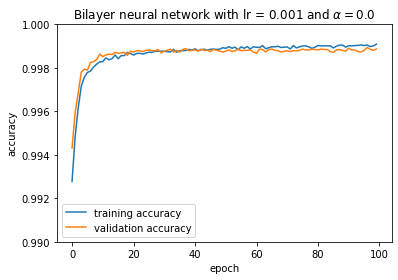

--- 222.7986478805542 seconds ---
Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.885%


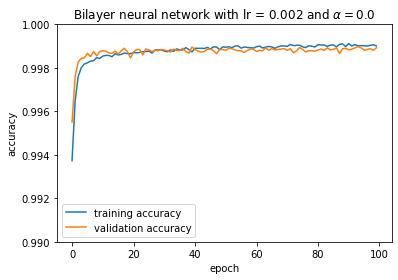

--- 447.3615388870239 seconds ---
Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.882%


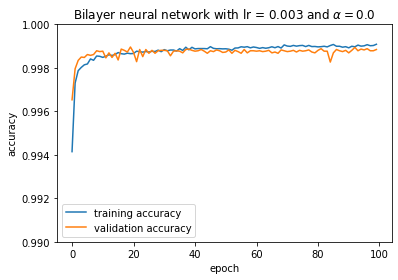

--- 672.4150080680847 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.896%


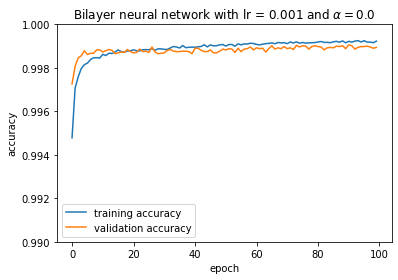

--- 933.1220240592957 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.887%


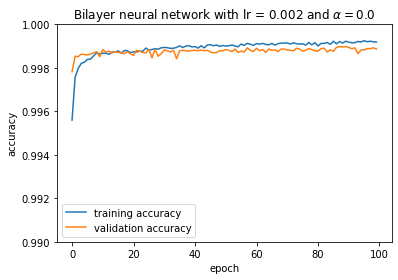

--- 1197.186196088791 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.897%


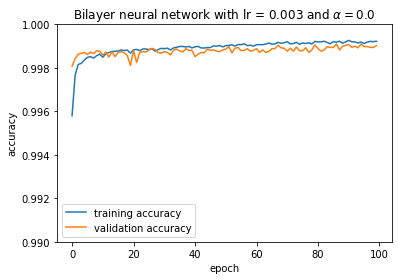

--- 1464.430338859558 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.897%


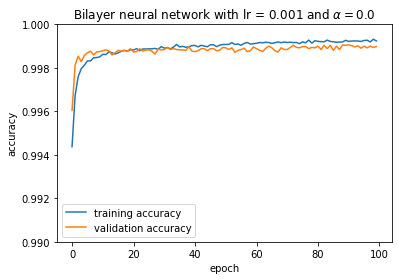

--- 1734.81378698349 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.895%


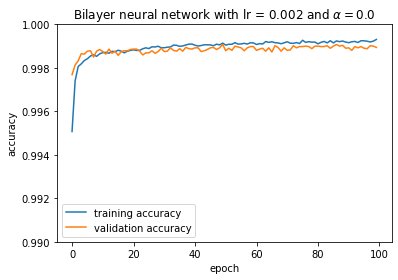

--- 2003.8852980136871 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.897%


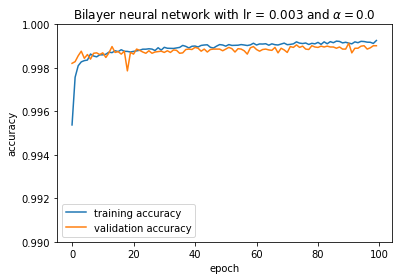

--- 2275.9946100711823 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.901%


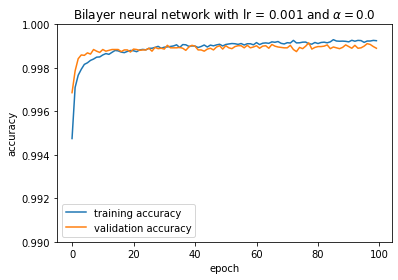

--- 2551.518018245697 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.892%


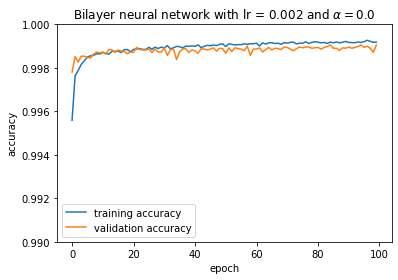

--- 2827.146296977997 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.893%


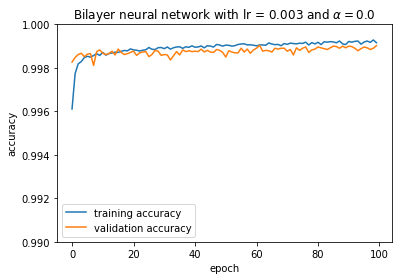

--- 3120.2605578899384 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.901%


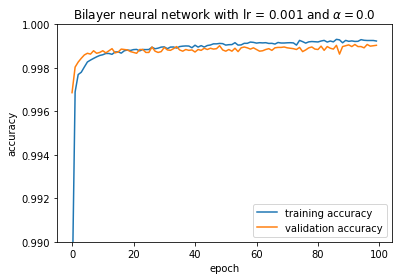

--- 3412.988305091858 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.897%


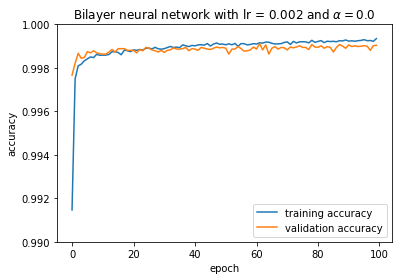

--- 3702.86225605011 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.896%


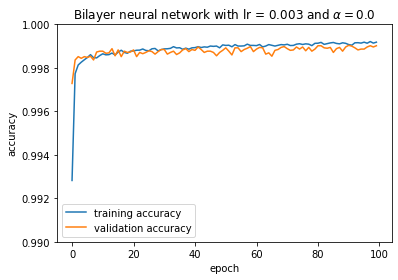

--- 3989.0669951438904 seconds ---
Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.894%


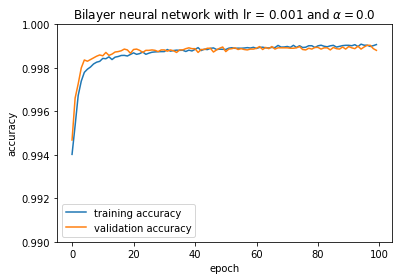

--- 4212.4889669418335 seconds ---
Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.887%


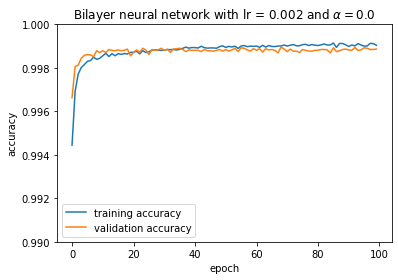

--- 4436.943042039871 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.891%


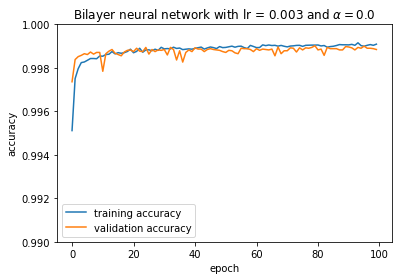

--- 4662.122211933136 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.902%


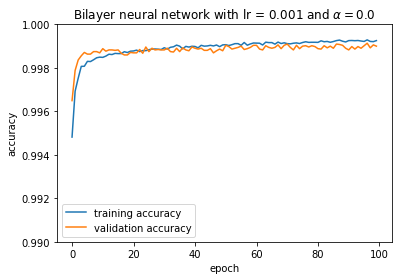

--- 4926.95082616806 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.897%


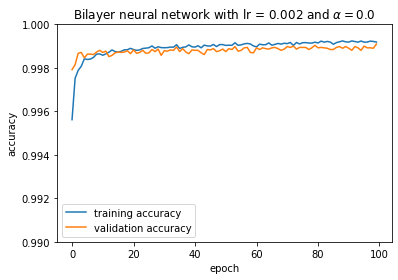

--- 5194.155300855637 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.886%


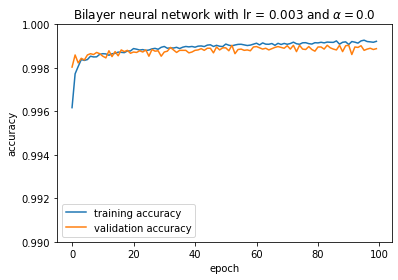

--- 5480.150372028351 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.903%


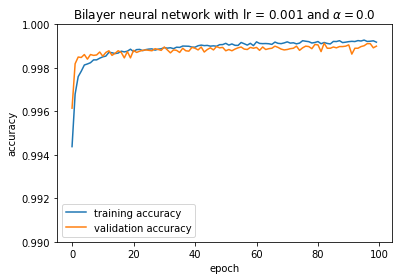

--- 5763.166068077087 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.891%


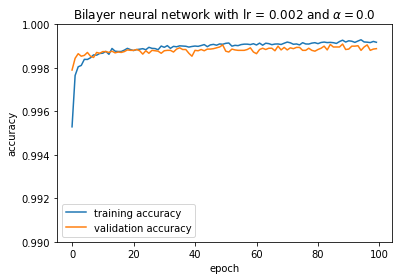

--- 6044.000787973404 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.888%


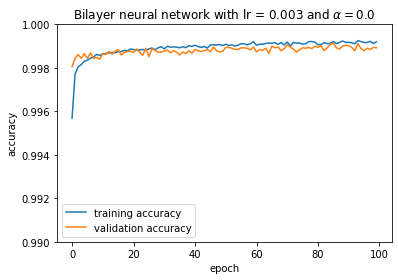

--- 6323.577196121216 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.898%


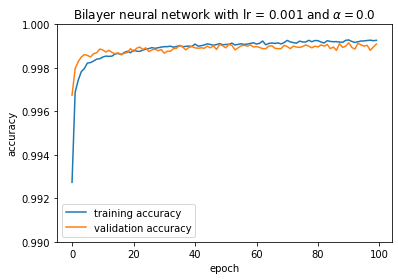

--- 6603.849135875702 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.892%


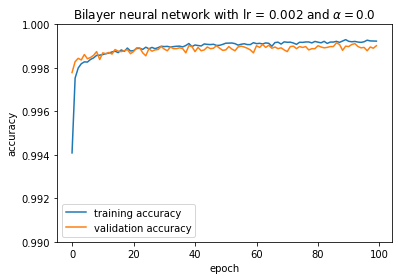

--- 6885.57386803627 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.897%


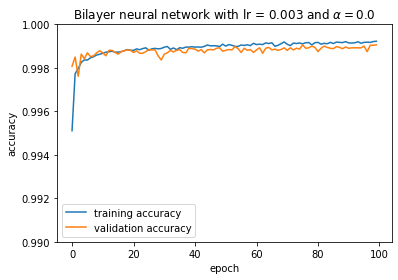

--- 7172.693337917328 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.909%


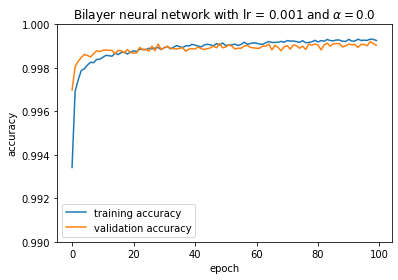

--- 7460.769222021103 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.896%


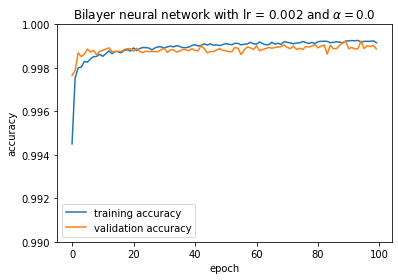

--- 7752.368818998337 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.896%


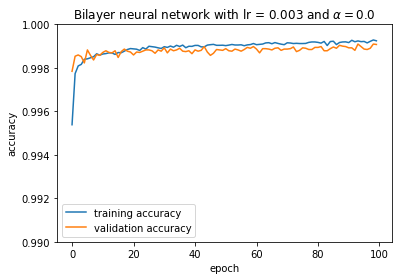

--- 8047.701349020004 seconds ---
Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.883%


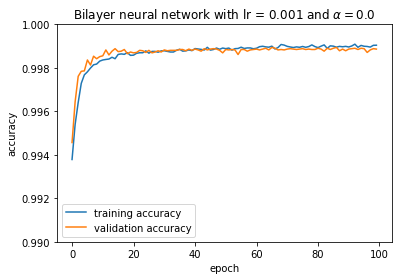

--- 8311.796596050262 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.889%


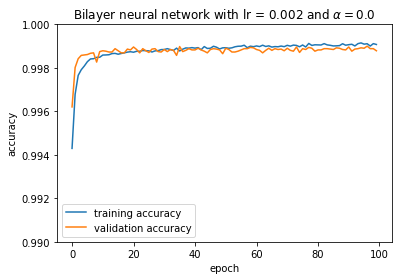

--- 8574.043576002121 seconds ---
Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.878%


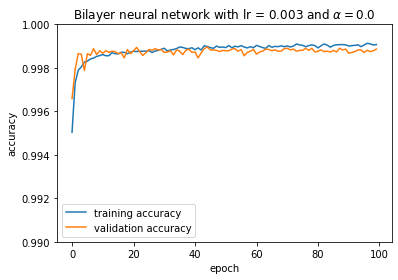

--- 8841.397691011429 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.909%


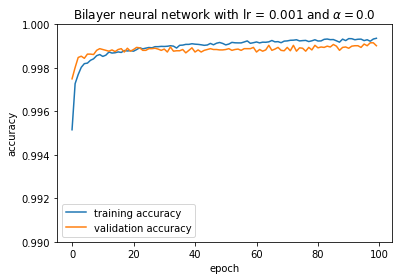

--- 9142.930505037308 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.898%


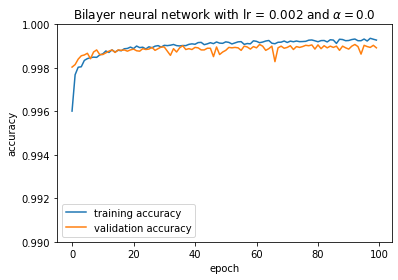

--- 9448.713885068893 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.894%


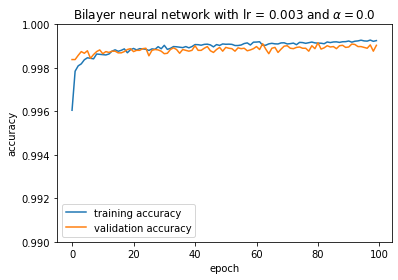

--- 9757.523190021515 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.908%


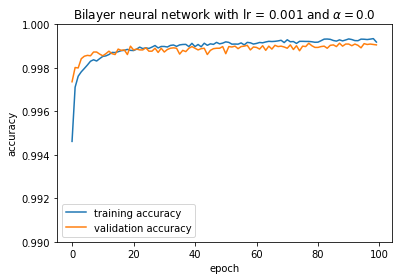

--- 10071.398424863815 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.904%


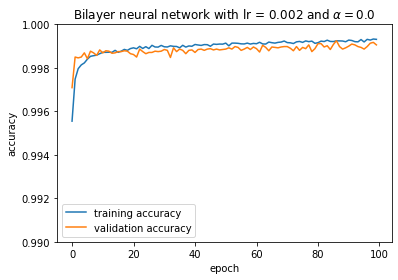

--- 10404.754487037659 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.909%


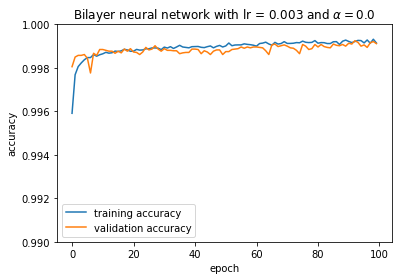

--- 10735.056556224823 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.905%


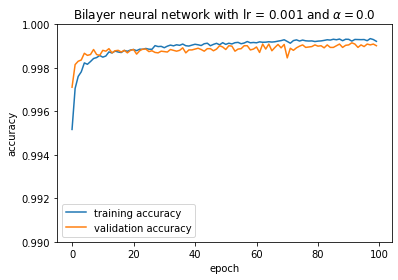

--- 11068.418471097946 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.910%


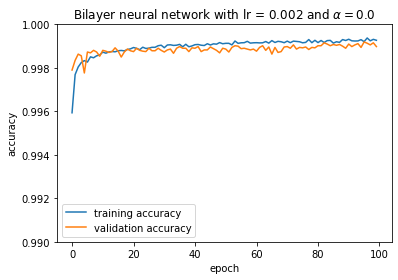

--- 11406.21082496643 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.901%


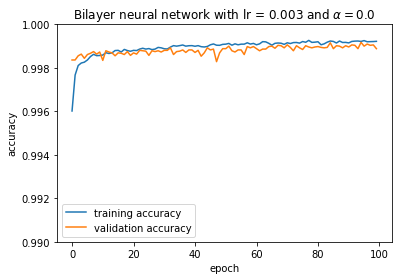

--- 11748.234220981598 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.896%


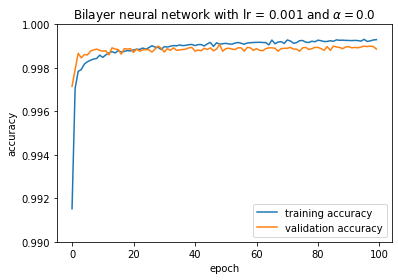

--- 12090.64406299591 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.900%


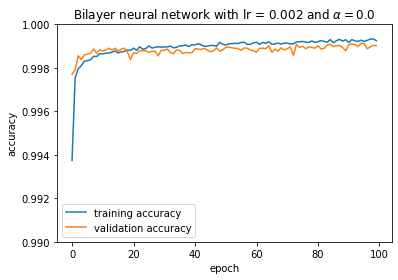

--- 12441.70205283165 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.901%


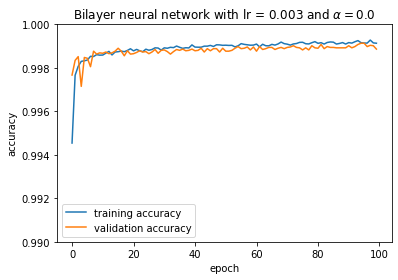

--- 12790.170844078064 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.889%


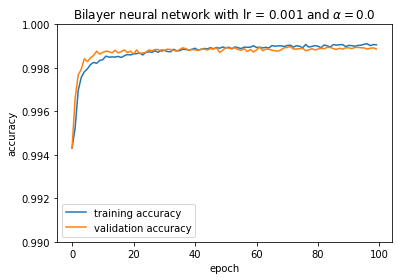

--- 13097.355880975723 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.886%


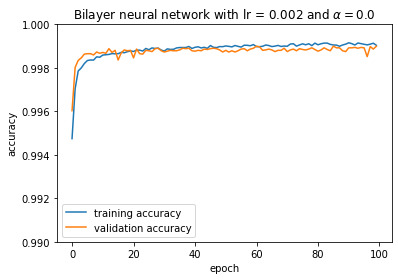

--- 13398.822864055634 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.886%


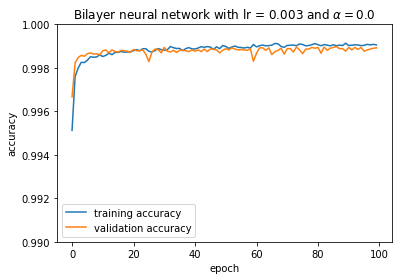

--- 13704.111593961716 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.905%


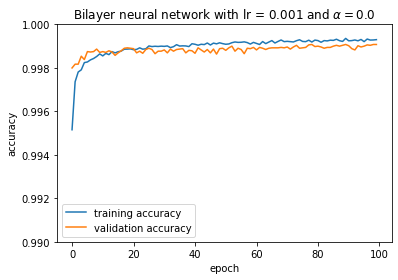

--- 14050.162370204926 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.898%


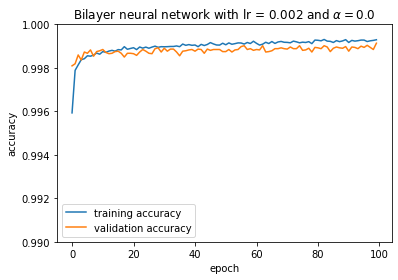

--- 14400.359091997147 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.890%


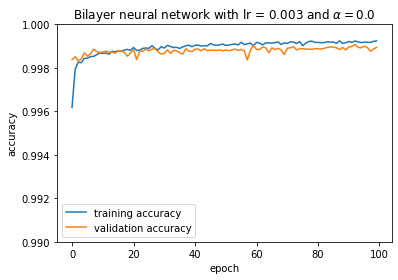

--- 14748.190757989883 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.894%


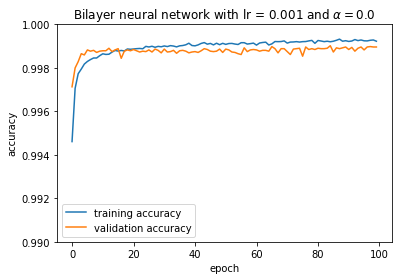

--- 15101.302217006683 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.889%


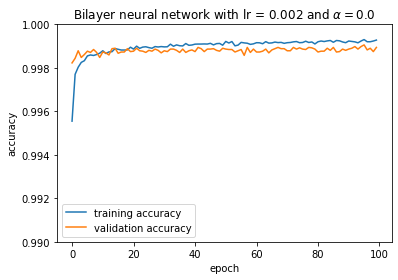

--- 15473.161947965622 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.892%


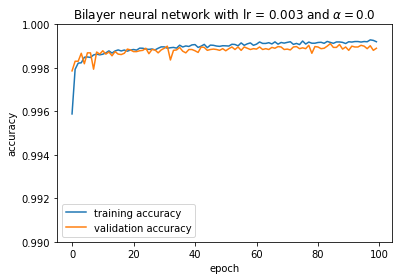

--- 15867.306448936462 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.903%


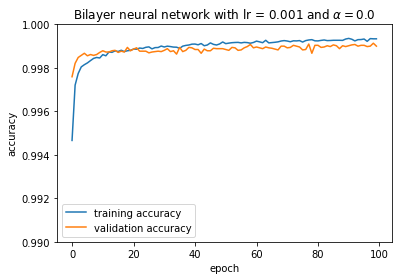

--- 16284.872485876083 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.892%


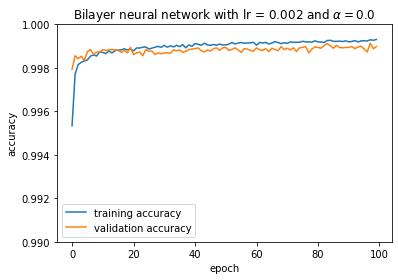

--- 16692.91263604164 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.900%


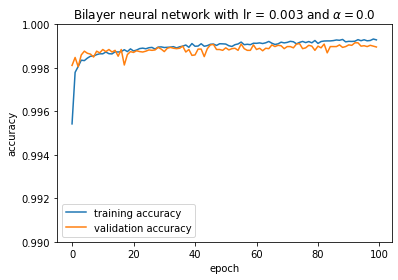

--- 17089.690323114395 seconds ---
Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.897%


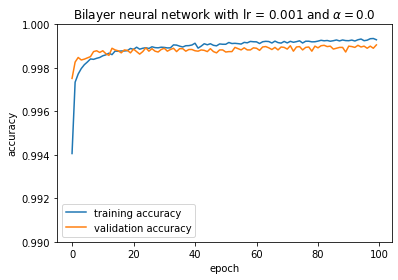

--- 17495.641780138016 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.897%


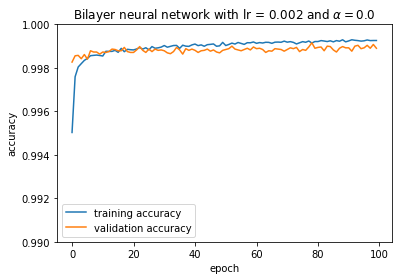

--- 17895.843382120132 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.890%


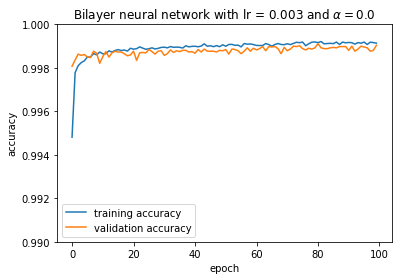

--- 18307.60100698471 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.884%


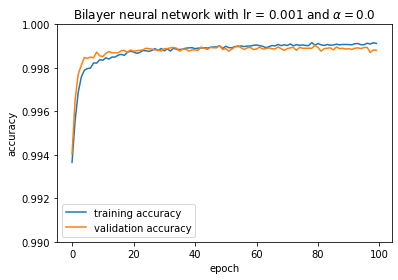

--- 18664.08537197113 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.884%


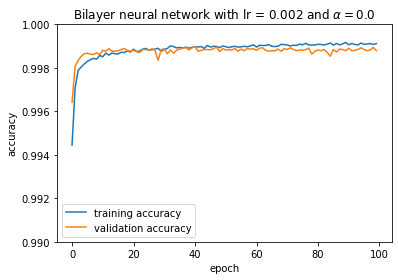

--- 19013.319792985916 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.879%


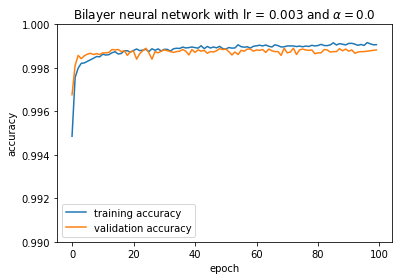

--- 19368.296085119247 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.897%


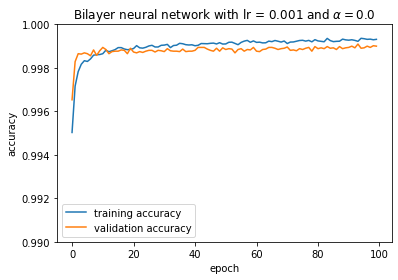

--- 19795.7075009346 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.903%


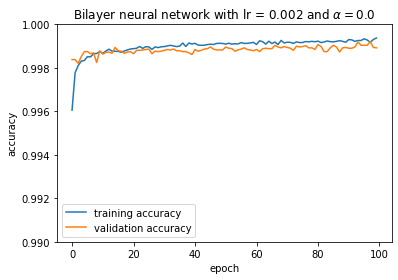

--- 20219.33144402504 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.891%


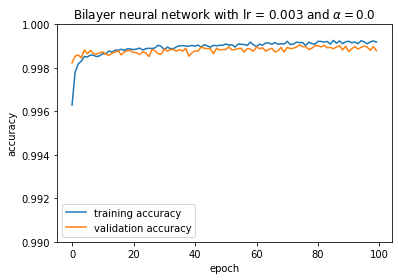

--- 20635.2579369545 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.900%


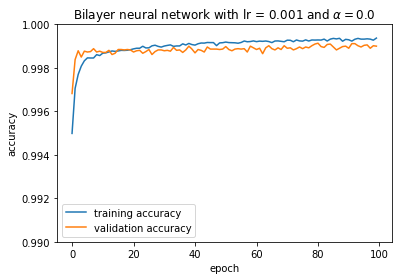

--- 21068.55236887932 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.904%


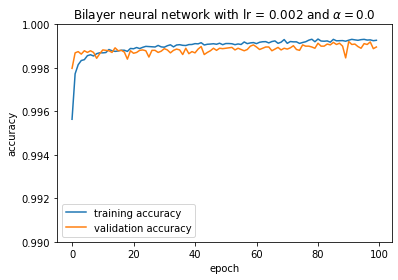

--- 21503.125961065292 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.895%


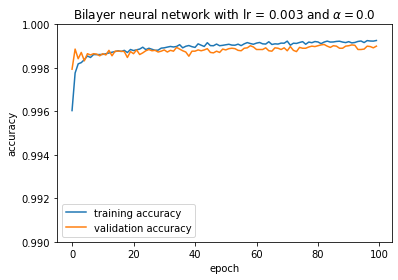

--- 21923.1979470253 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.907%


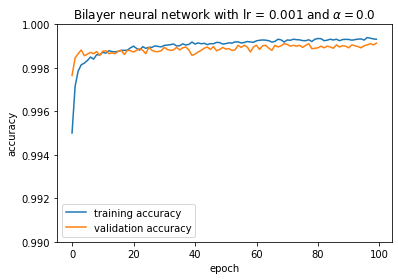

--- 22356.29886007309 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.902%


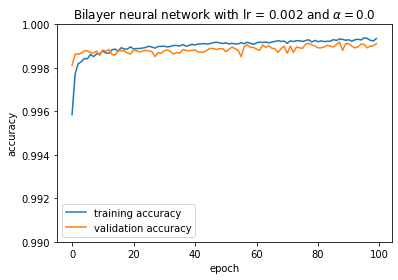

--- 22774.45492196083 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.911%


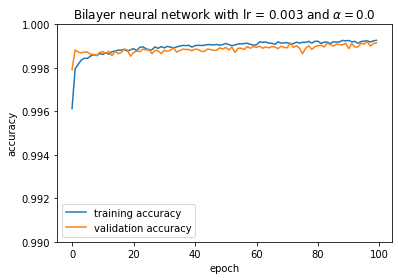

--- 23197.802043914795 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.913%


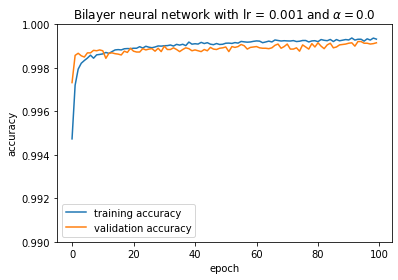

--- 23623.90214419365 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.910%


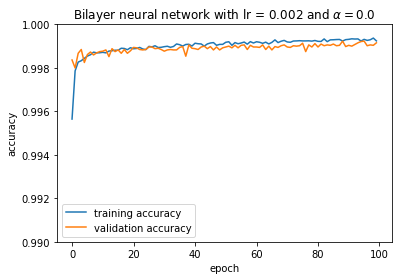

--- 24072.400826931 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.918%


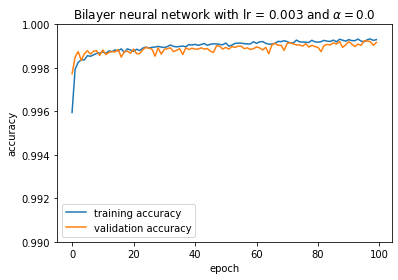

--- 24542.146457910538 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.895%


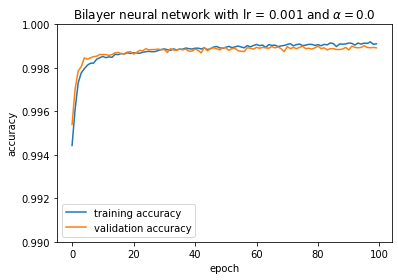

--- 24971.303533792496 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.887%


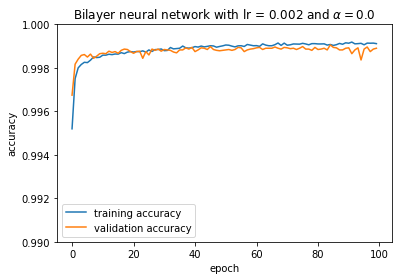

--- 55715.55282688141 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.889%


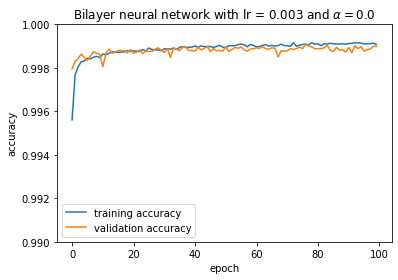

--- 56122.511192798615 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.906%


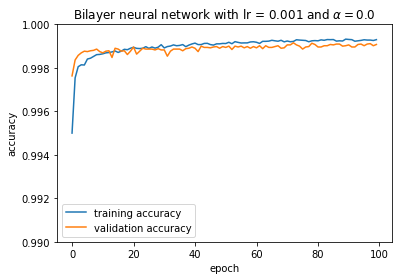

--- 56577.78696799278 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.906%


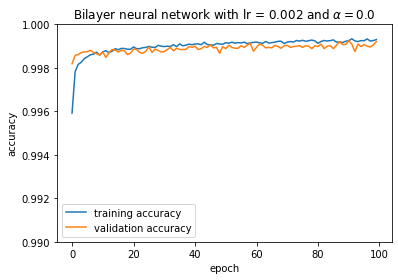

--- 57032.46851992607 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.894%


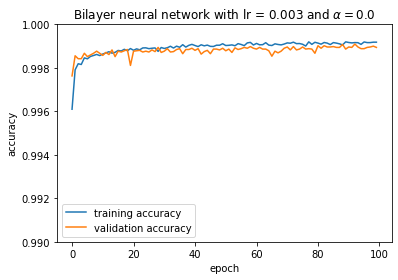

--- 57484.651093006134 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.894%


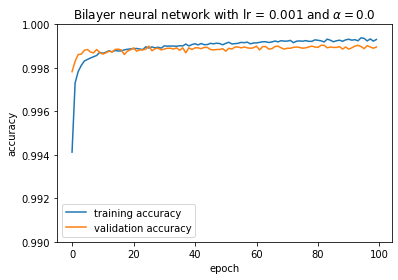

--- 57930.904180049896 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.899%


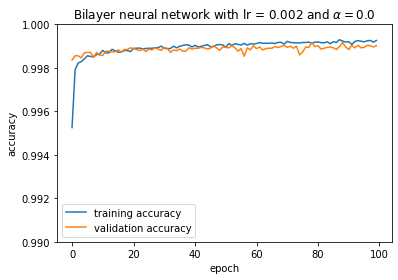

--- 58374.797509908676 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.891%


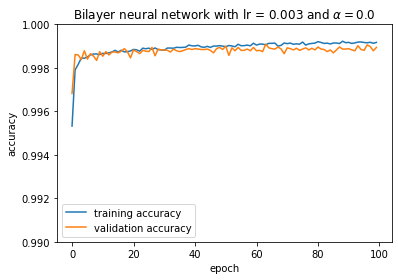

--- 58821.79711294174 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.903%


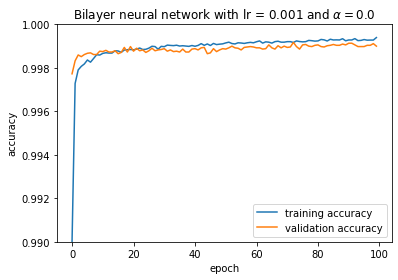

--- 59270.26410698891 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.894%


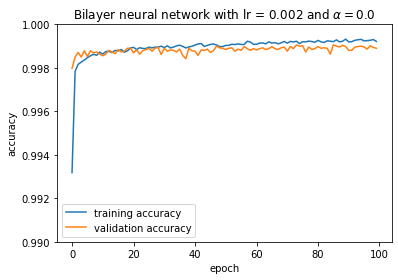

--- 59725.08132791519 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.893%


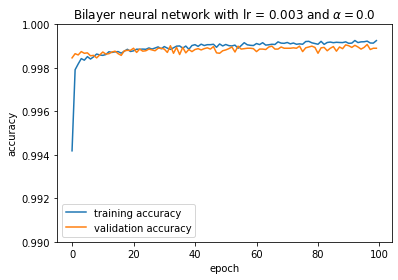

--- 60185.5222120285 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.902%


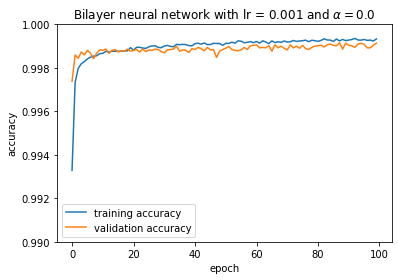

--- 60648.30081701279 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.883%


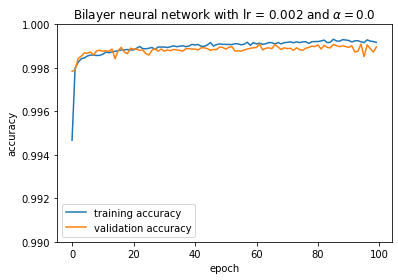

--- 61103.99777793884 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.1, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.899%


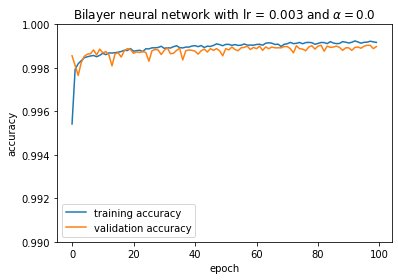

--- 61569.3643321991 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.887%


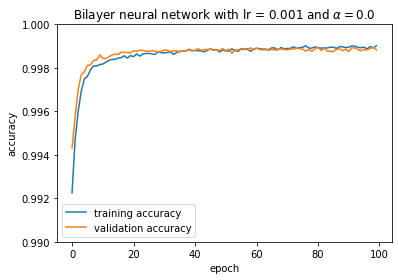

--- 61998.69683909416 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.881%


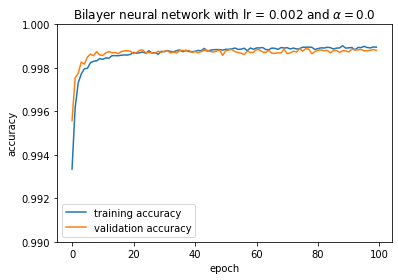

--- 62451.14139389992 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.869%


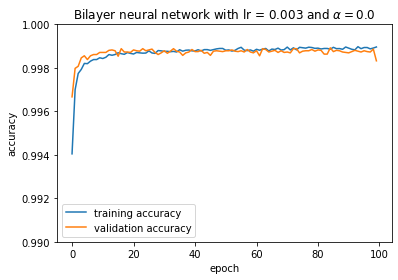

--- 62904.15378904343 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.896%


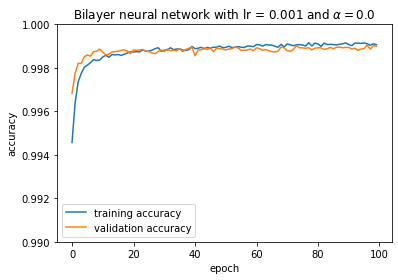

--- 63395.18827199936 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.886%


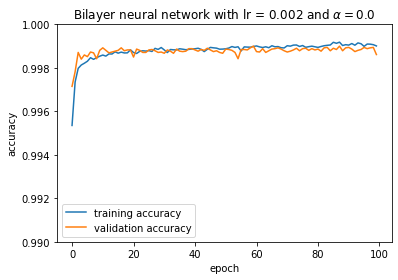

--- 63876.54350185394 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.875%


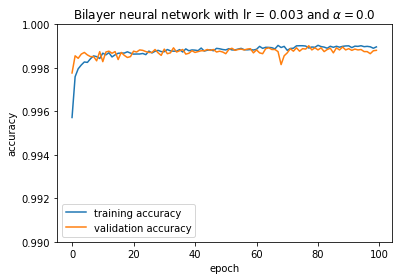

--- 64356.51361012459 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.891%


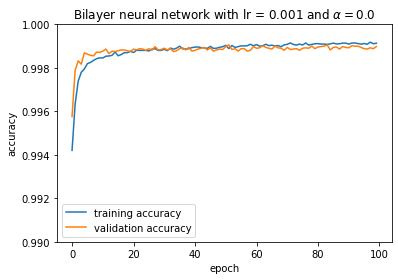

--- 64841.011424064636 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.896%


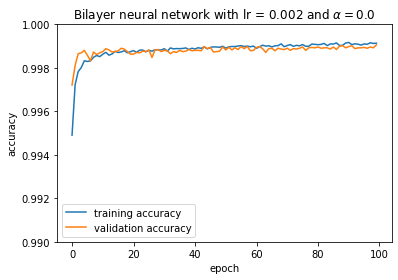

--- 65329.026165008545 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.881%


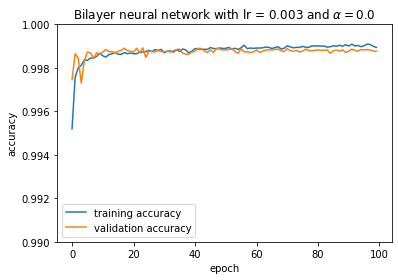

--- 65819.77475690842 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.889%


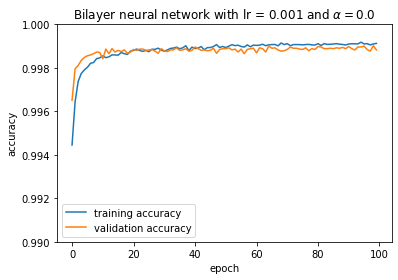

--- 66312.09785103798 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.883%


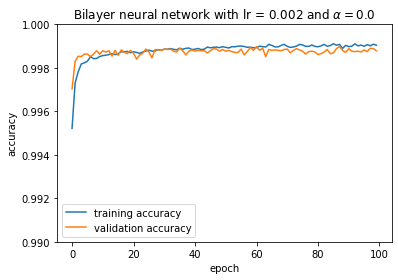

--- 66826.63638997078 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.880%


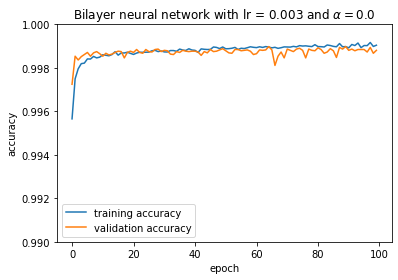

--- 67344.89047002792 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.894%


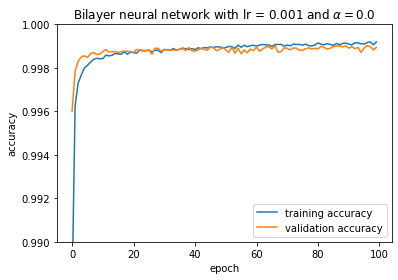

--- 67866.97922205925 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.885%


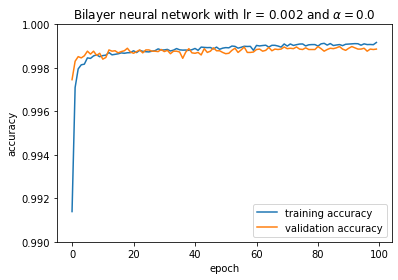

--- 68384.56938290596 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 50, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.891%


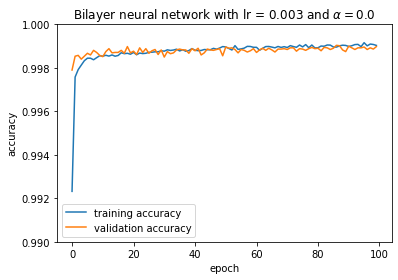

--- 68914.39367699623 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.895%


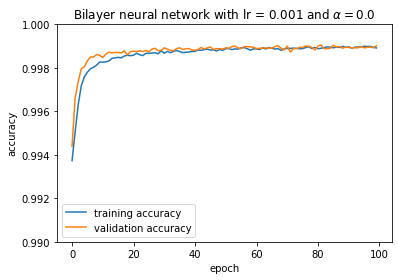

--- 69373.45737719536 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.888%


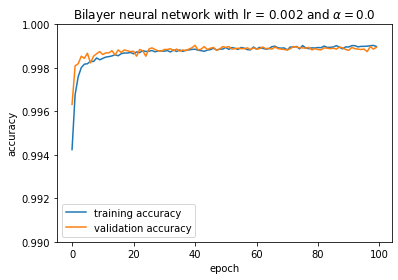

--- 69826.22446608543 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.891%


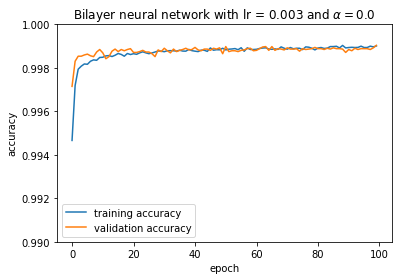

--- 70276.16807699203 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.893%


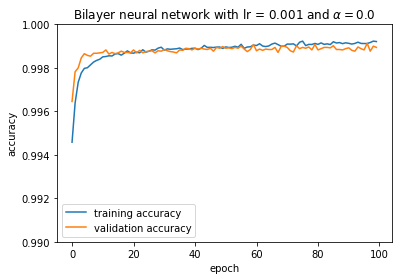

--- 70770.24666714668 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.902%


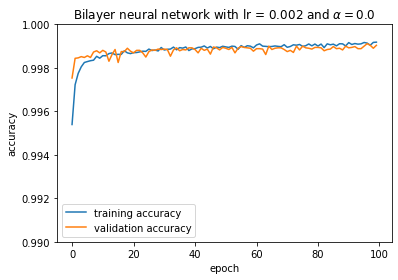

--- 71265.42056894302 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.888%


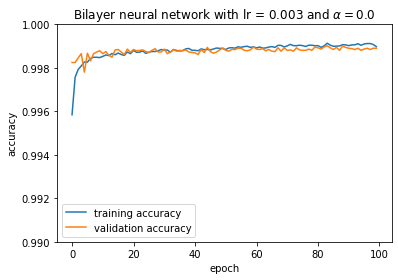

--- 71761.18812918663 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.899%


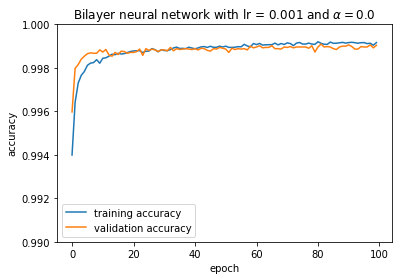

--- 72270.71343708038 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.892%


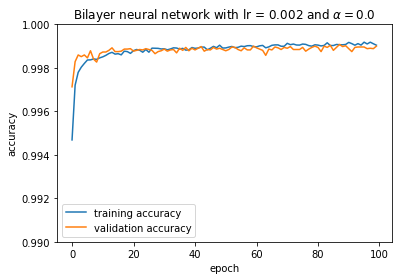

--- 72774.54777002335 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.896%


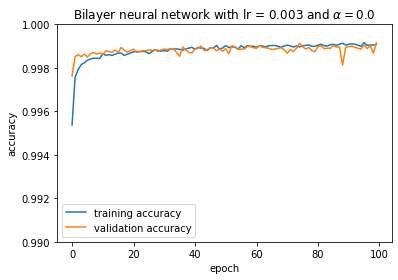

--- 73302.22227311134 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.897%


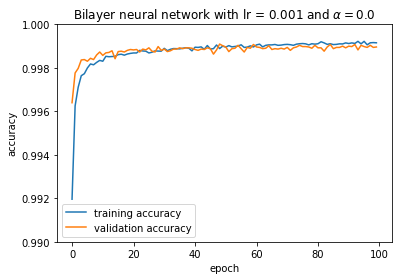

--- 73829.42365098 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.889%


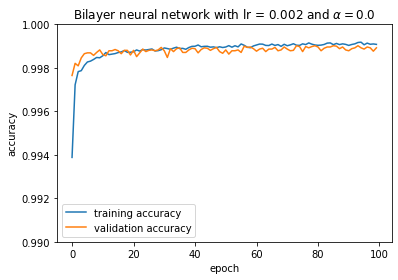

--- 74343.55342006683 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.888%


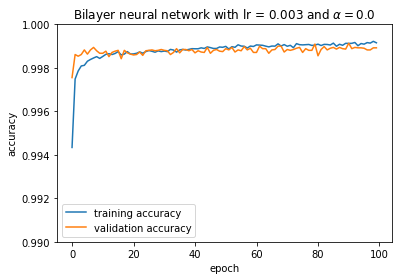

--- 74859.354763031 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.898%


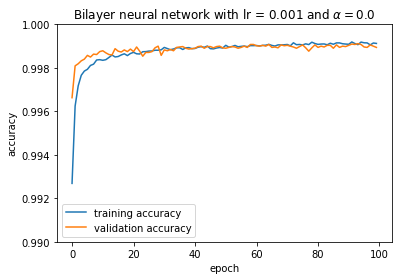

--- 75374.14913606644 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.892%


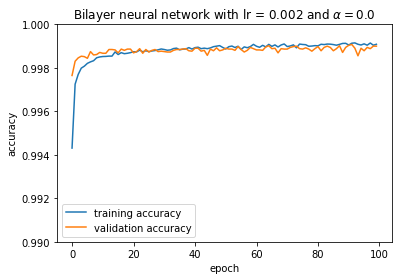

--- 75891.29838180542 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 55, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.899%


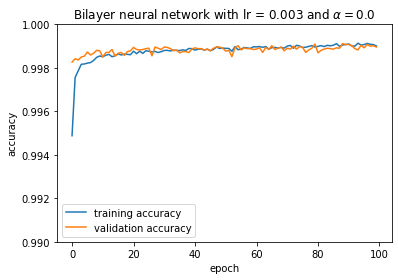

--- 76413.51253199577 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.891%


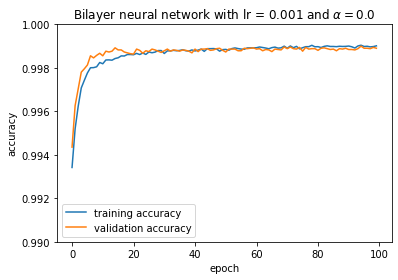

--- 76924.11732697487 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.897%


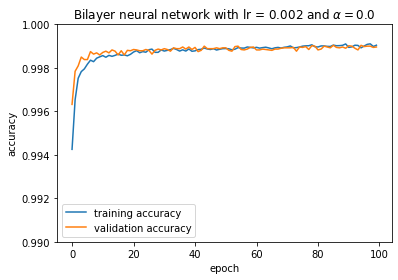

--- 77434.53188681602 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.881%


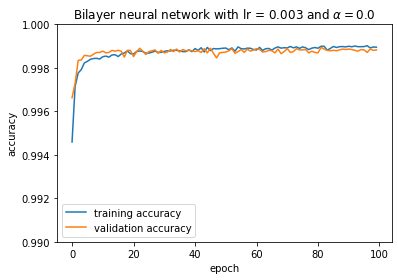

--- 77941.09668207169 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.899%


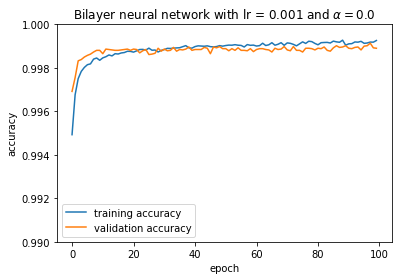

--- 78476.56394982338 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.886%


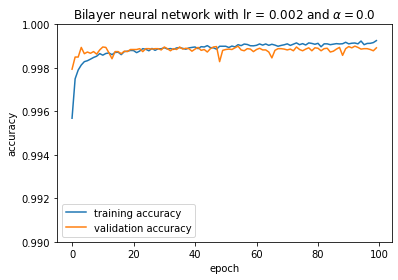

--- 79017.57546401024 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.903%


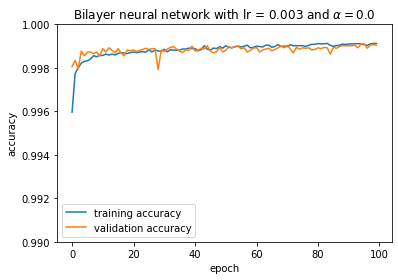

--- 79582.33801102638 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.905%


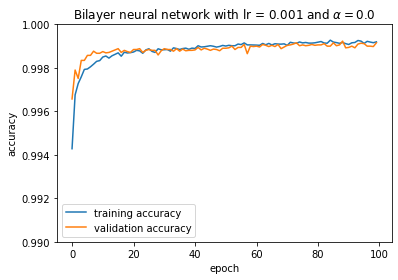

--- 80145.90029597282 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.889%


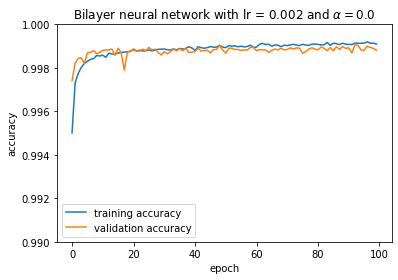

--- 80699.09855008125 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.896%


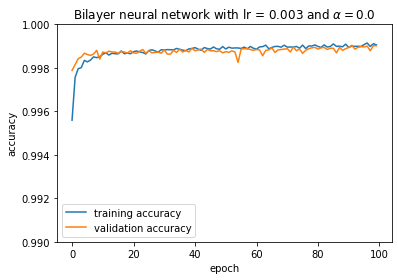

--- 81251.57983589172 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.894%


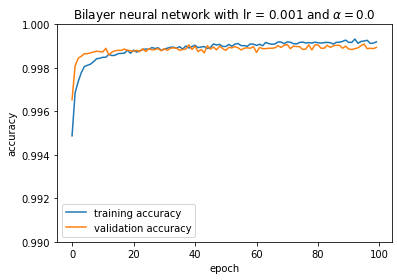

--- 81806.92539596558 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.897%


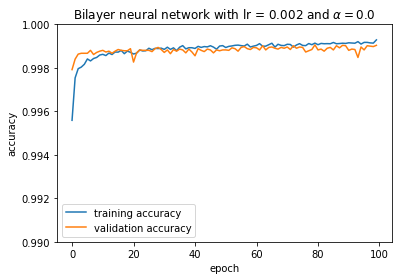

--- 82366.93714118004 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.881%


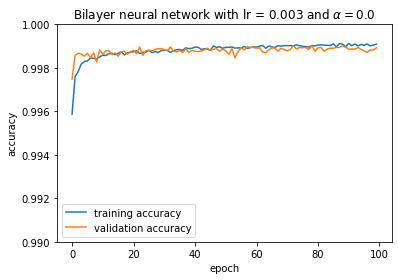

--- 82947.57791113853 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.888%


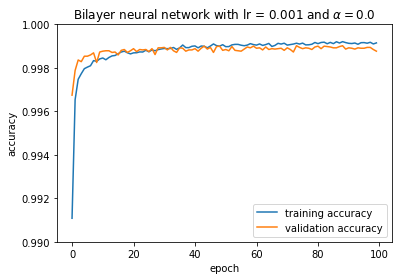

--- 83531.78574085236 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.888%


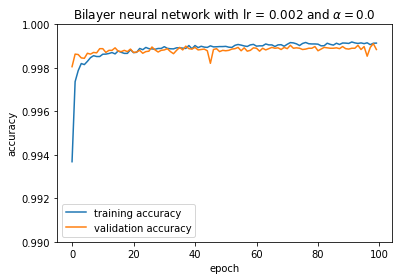

--- 84196.94275379181 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 60, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.896%


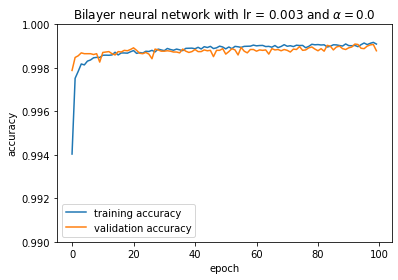

--- 84794.51505112648 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.888%


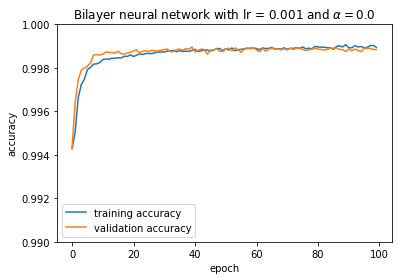

--- 85354.70524978638 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.890%


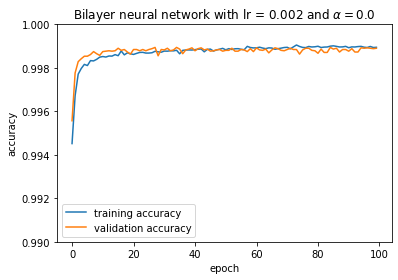

--- 85907.22435307503 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.881%


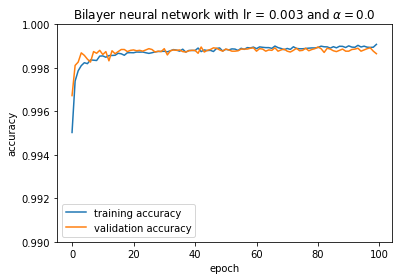

--- 86482.69001722336 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.895%


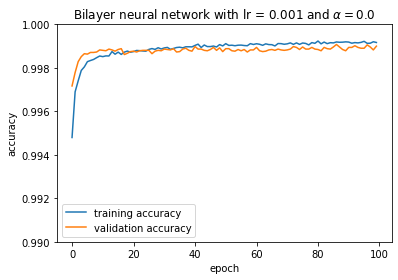

--- 87207.07557106018 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.890%


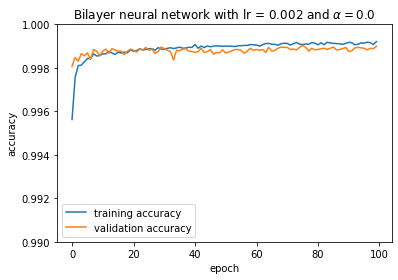

--- 87933.9175901413 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.891%


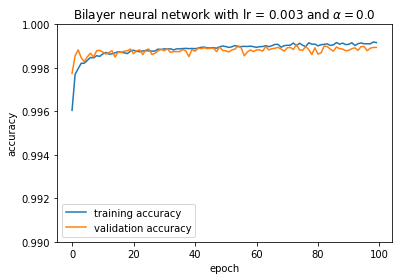

--- 88676.65702795982 seconds ---

Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.895%


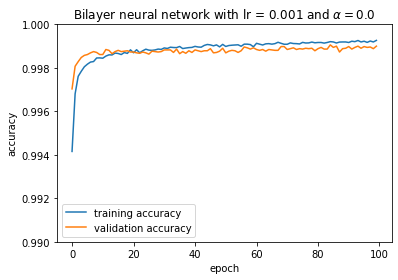

--- 89463.77221107483 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.894%


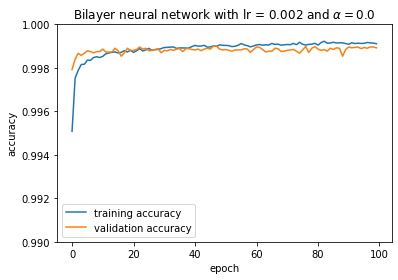

--- 90181.04036784172 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.894%


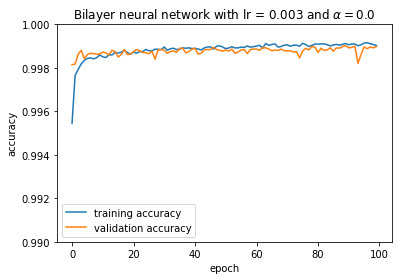

--- 90931.4341750145 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.892%


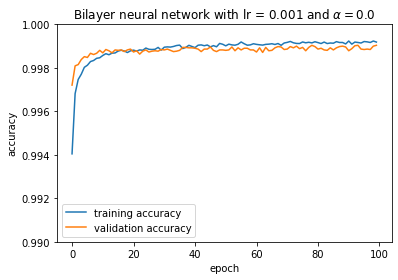

--- 91666.9176158905 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.892%


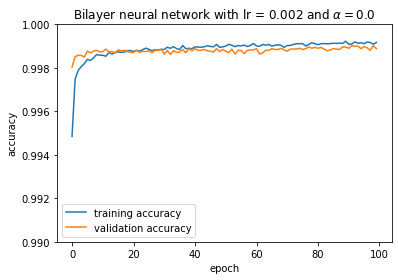

--- 92271.8971631527 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.885%


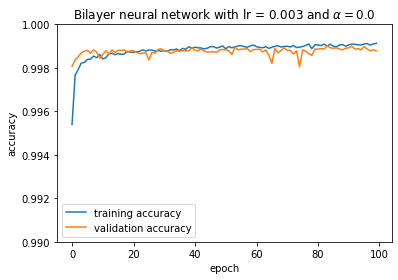

--- 92879.1780371666 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.895%


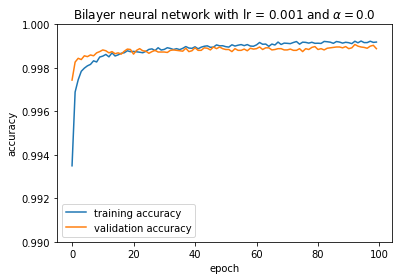

--- 93486.9430630207 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.890%


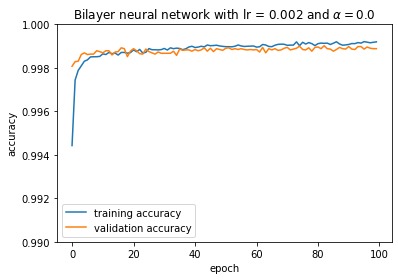

--- 94116.87246608734 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 65, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.879%


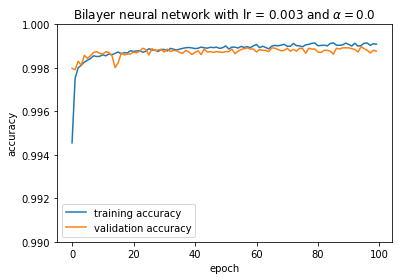

--- 94748.89329504967 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.888%


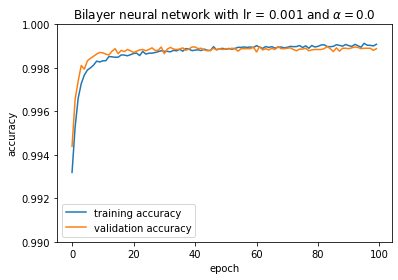

--- 95321.82851791382 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.887%


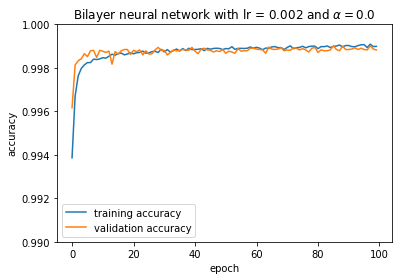

--- 95898.06781816483 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.887%


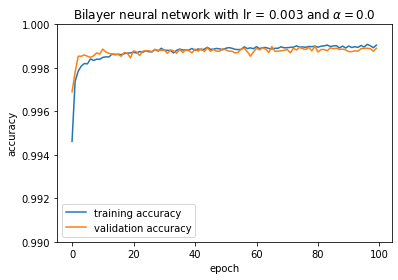

--- 96473.01800298691 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.892%


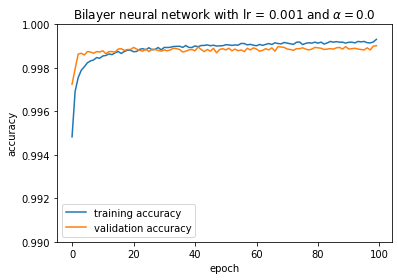

--- 97092.47313213348 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.880%


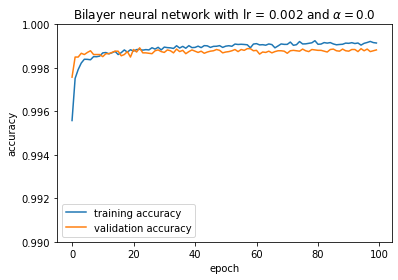

--- 97739.67794108391 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.880%


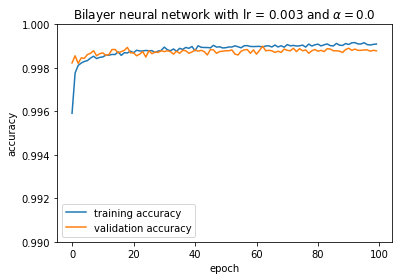

--- 98384.87736797333 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.894%


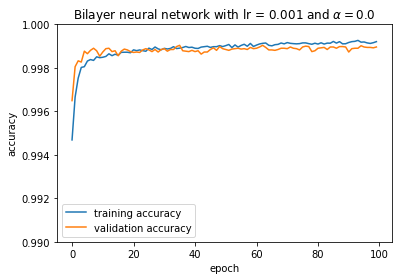

--- 99016.46151208878 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.901%


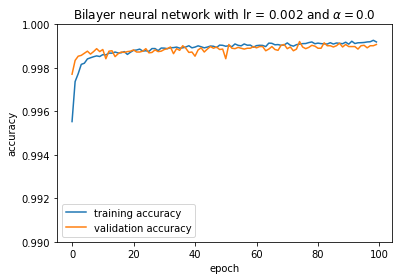

--- 99650.07626700401 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.885%


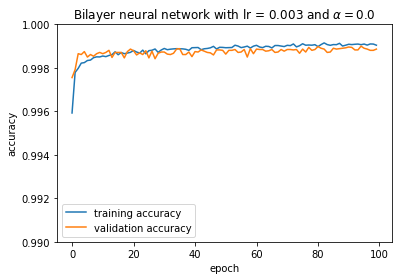

--- 100289.21175694466 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.894%


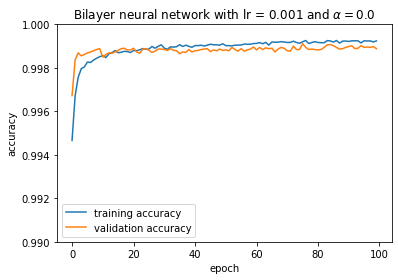

--- 100930.93457007408 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.904%


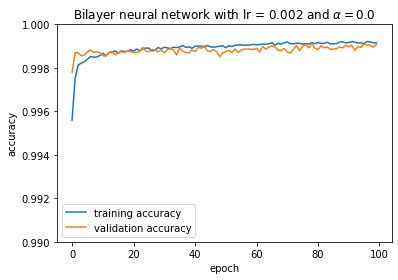

--- 101632.8095099926 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.887%


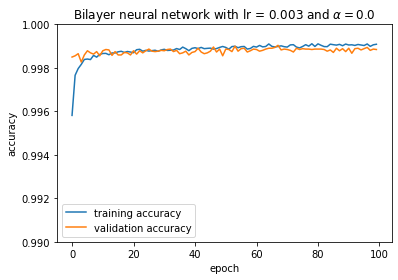

--- 102309.25057220459 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.900%


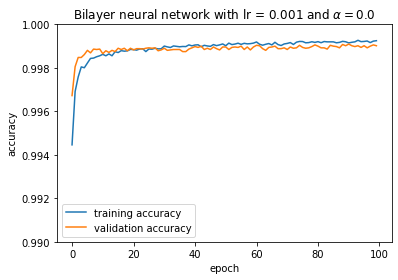

--- 102980.06516218185 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.895%


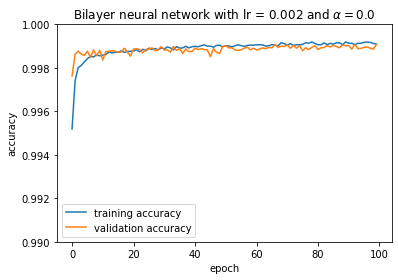

--- 103666.11660289764 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 70, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.893%


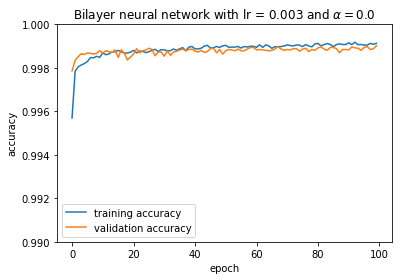

--- 104340.92805099487 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.001}


 => validation score 99.886%


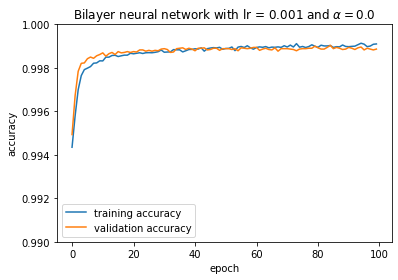

--- 104969.16643309593 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.002}


 => validation score 99.890%


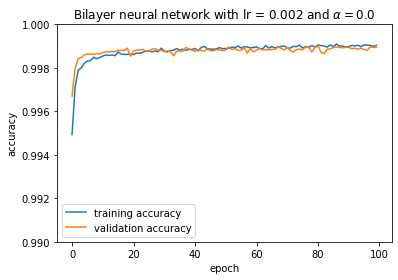

--- 105645.48446917534 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 0, 'sgd_learnrate': 0.003}


 => validation score 99.888%


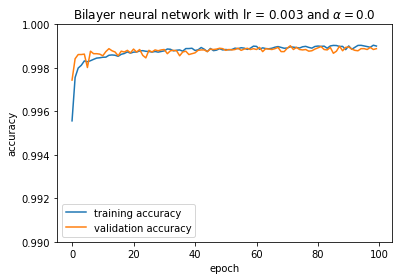

--- 106327.53880620003 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.001}


 => validation score 99.911%


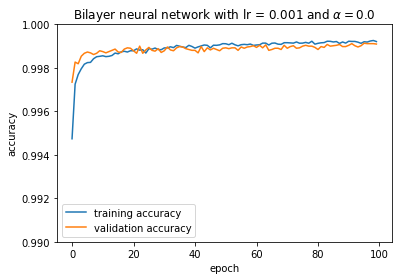

--- 107053.18813180923 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.002}


 => validation score 99.902%


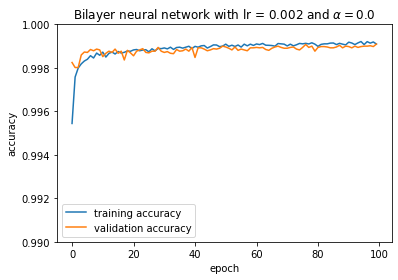

--- 107752.87390804291 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 45, 'sgd_learnrate': 0.003}


 => validation score 99.886%


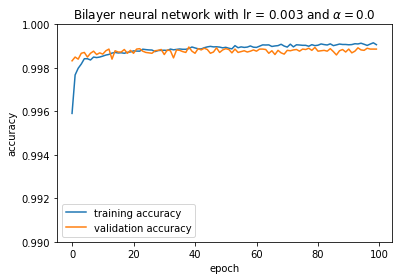

--- 108458.96938085556 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.001}


 => validation score 99.901%


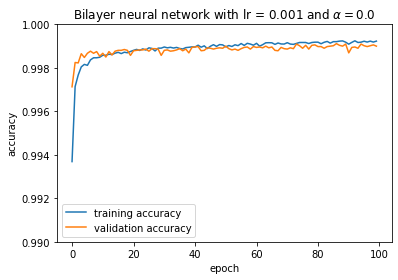

--- 109188.88093590736 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.002}


 => validation score 99.885%


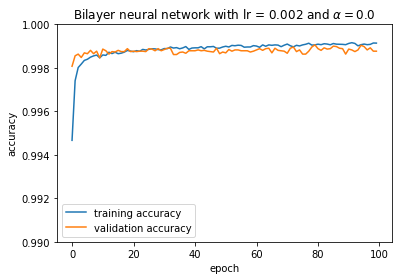

--- 109922.56012296677 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 50, 'sgd_learnrate': 0.003}


 => validation score 99.894%


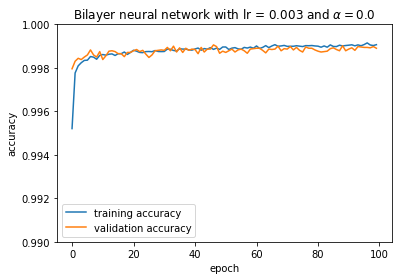

--- 110648.63921999931 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.001}


 => validation score 99.902%


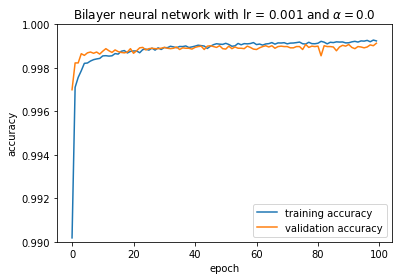

--- 111365.06372785568 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.002}


 => validation score 99.897%


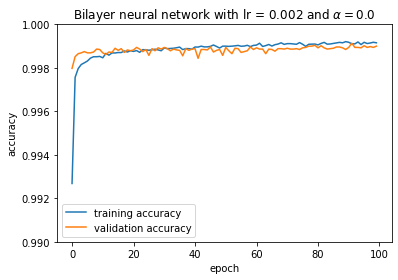

--- 112083.06226301193 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 55, 'sgd_learnrate': 0.003}


 => validation score 99.887%


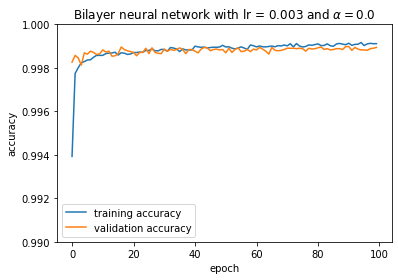

--- 112840.2541410923 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.001}


 => validation score 99.902%


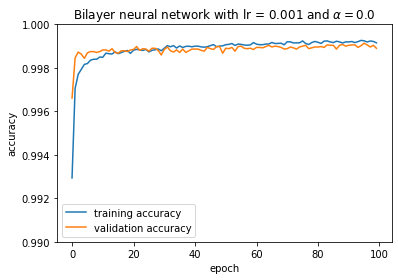

--- 113598.13129997253 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.002}


 => validation score 99.899%


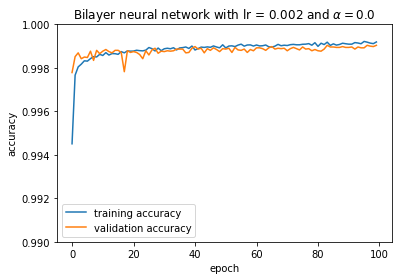

--- 142164.22493195534 seconds ---


Fitting with parameters {'class_weight': array([ 0.50285418, 88.09083192]), 'dropout_rate': 0.2, 'l2_alpha': 0.0, 'number_of_hidden1_layers': 75, 'number_of_hidden2_layers': 60, 'sgd_learnrate': 0.003}


 => validation score 99.893%


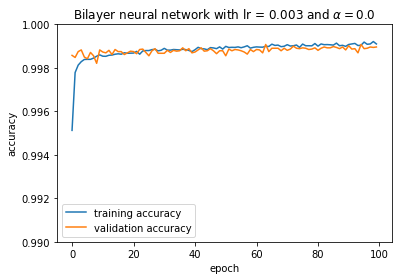

--- 142873.32088708878 seconds ---


In [9]:
from keras.utils import to_categorical
import numpy as np

import time
start_time = time.time()

# Save accuracy on test set
no_last = 5 # Take the last 5 due to the upwards shape of the curve at its end
test_scores = []

# Parameters for fitting with batches and epochs
epochs = 100
batch_size = 320 # Default batch_size = 32
# Playing around with batch sizes of [3, 30, None=32, 320, 3200] shows the effect
#  that the bigger the size, the faster the calculation performance,
#  ... the worse the convergence. => Batch size has effect of learning rate.
# 320 seems to be the perfect value.

for params_dict in grid :

    model = build_and_compile_nn(params_dict)
    
    print('Fitting with parameters', params_dict)
    # Fit the model
    history = model.fit(
        x=X_tr, y=to_categorical(y_tr),
        batch_size=batch_size, 
        epochs=epochs,
        validation_data=(X_te, to_categorical(y_te)),
        class_weight=params_dict['class_weight']
        , verbose=0
    )

    # Save accuracy on train set and validation set
    params_dict['accuracy_tr'] = np.mean(history.history['accuracy'][-no_last:])
    params_dict['accuracy_val'] = np.mean(history.history['val_accuracy'][-no_last:])
    params_dict['log_accuracy_tr'] = -np.log(1-np.mean(history.history['accuracy'][-no_last:]))
    params_dict['log_accuracy_val'] = -np.log(1-np.mean(history.history['val_accuracy'][-no_last:]))

    print(' => validation score {:.3f}%'.format(100*params_dict['accuracy_val']))
    # Save result
    test_scores.append(params_dict)
    
    plot_result(history, params_dict)
    print("--- %s seconds ---" % (time.time() - start_time))
    
# Save measured accuracies
df_test_scores_nn = pd.DataFrame(test_scores).sort_values('accuracy_val', ascending=False)

In [10]:
pd.set_option("display.max_rows", len(grid))

pd.DataFrame(test_scores).sort_values('accuracy_val', ascending=False)

class_weight  dropout_rate  l2_alpha  \
74   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
72   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
71   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
168  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
40   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
73   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
38   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
27   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
33   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
36   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
69   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
78   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
79   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
39   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
126  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
48   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
160  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
67   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
37   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
84   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
21   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
125  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
64   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
54   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
18   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
70   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
169  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
109  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
87   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
174  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
177  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
41   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
157  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
9    [0.5028541799926344, 88.09083191850594]           0.1       0.0   
171  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
12   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
44   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
43   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
66   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
162  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
56   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
178  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
119  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
82   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
123  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
89   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
111  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
34   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
117  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
49   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
24   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
121  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
175  [0.5028541799926344, 88.09083191850594]           0.2       0.0   
63   [0.5028541799926344, 88.09083191850594]           0.1       0.0   
26   [0.5028541799926344, 88.09083191850594]           0.1       0.0   


With the DataFrame of the scoring results, the best Neural Network can be assessed. The parameters for the best classifier can be seen below and a new training process with a high number of epochs will be started.

The parameters for the best model are ...
l2_alpha = 0.0
sgd_learnrate = 0.003
dropout_rate = 0.1
class_weight = [ 0.50285418 88.09083192]
number_of_hidden1_layers = 70
number_of_hidden2_layers = 60


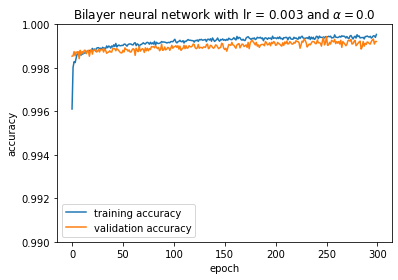

In [11]:
best_params = cff.get_best_parameters(test_scores, parameter_dictionary)

model_best = build_and_compile_nn(best_params)

# Check Model configuration
model_best.get_config()

# Parameters for fitting with batches and epochs
epochs = 300
batch_size = 320

# Fit the model
history_best = model_best.fit(
    x=X_tr, y=to_categorical(y_tr),
    batch_size=batch_size, epochs=epochs,
    validation_data=(X_te, to_categorical(y_te))
    , verbose=0
)

plot_result(history_best, best_params)

The accuracy scores of the last $\texttt{no}\_\texttt{last}$ validation measurements shall be printed for the best long run trained Neural Network.

In [12]:
no_last = 5 # I take the last 5 due to the upwards shape of the curve at its end

print('Mean last {:d} validation accuracy : {:.3f}%'.format(
    no_last, 100*np.mean(history_best.history['val_accuracy'][-no_last:])
))

print('Neural network accuracy (test set): {:.3f}%'.format(
    100*model.evaluate(X_te, to_categorical(y_te),
                   verbose=0)[1] # Loss is at index=0, accuracy at index=1
))

Mean last 5 validation accuracy : 99.923%


Neural network accuracy (test set): 99.896%


The architecture of the best model is shown in the following output cell.

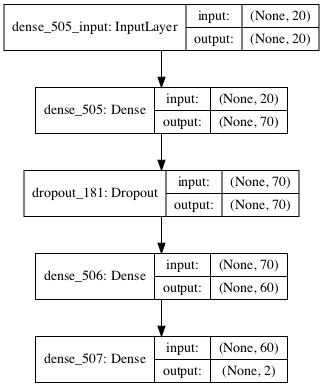

In [13]:
from keras.utils import plot_model

path_model_graphics = './documentation'
model_png = os.path.join(path_model_graphics,'model.png')

plot_model(model_best, show_shapes=True, dpi=72, to_file=model_png)

### General Observations

For the models trained above, some general observations can be expressed.
- The validation curves in the plots above lay below the training curves. This is an indicator of a valid model behaviour.
- The curves of the validation accuracy above show the behaviour of approaching their constant maximum value only very slowly. A very high number of epochs is needed to reach the maximum value of the validation accuracy. Some simulation have been done in the course of the project with a number of epochs of 500. Even with this high number of epochs, there could still be seen a slight slope in the validation accurace, indicating that the model was still learning and improving. The validation accuracy has never surpassed a value of 99.93%, though. The latter observation led to the conviction that the accuracy of the model would not be increased significantly, increasing the number of epochs even to a value higher than 500.
- Although the best estimator model has an architecture with a second hidden layer, one hidden layer is sufficient. Adding a second hidden layer to the Neural Network does not raise the quality of the model essentially.

### Performance Measurement

The performance measurement of the best model has been described in chapter [Decision Tree Model](./6_DecisionTreeModel.ipynb) and is shown without any further comment.

In [14]:
from sklearn.metrics import confusion_matrix

y_pred = model_best.predict_classes(X_te)

confusion_matrix(y_te, y_pred)

array([[51566,    25],
       [   16,   279]])

In [15]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from keras.metrics import accuracy

# .score() function of sklearn models results in the same value as .accuracy_score() function of sklearn.metrics.
#  Keras library does not offer any .score() function but only .evaluate().
#  Is second metric of .evaluate(X_te, y_te) == .accuracy_score(y_te, y_pred)? <= See the output.
print('Score {:.3f}%'.format(100*model_best.evaluate(x=X_te, y=to_categorical(y_te))[1]))
print('Area under the curve {:.3f}% - accuracy {:.3f}% - precision {:.3f}% - recall {:.3f}%'.format(100*roc_auc_score(y_te, y_pred),
                100*accuracy_score(y_te, y_pred),
                100*precision_score(y_te, y_pred),
                100*recall_score(y_te, y_pred)
               ))

   32/51886 [..............................] - ETA: 9s

  320/51886 [..............................] - ETA: 9s

  608/51886 [..............................] - ETA: 9s

  896/51886 [..............................] - ETA: 9s

 1184/51886 [..............................] - ETA: 9s

 1472/51886 [..............................] - ETA: 9s

 1760/51886 [>.............................] - ETA: 9s

 2048/51886 [>.............................] - ETA: 9s

 2336/51886 [>.............................] - ETA: 9s

 2624/51886 [>.............................] - ETA: 9s

 2912/51886 [>.............................] - ETA: 8s

 3200/51886 [>.............................] - ETA: 8s

 3488/51886 [=>............................] - ETA: 8s

 3776/51886 [=>............................] - ETA: 8s

 4064/51886 [=>............................] - ETA: 8s

 4352/51886 [=>............................] - ETA: 8s

 4640/51886 [=>............................] - ETA: 8s

 4928/51886 [=>............................] - ETA: 8s

 5216/51886 [==>...........................] - ETA: 8s

 5504/51886 [==>...........................] - ETA: 8s

 5792/51886 [==>...........................] - ETA: 8s

 6080/51886 [==>...........................] - ETA: 8s

 6368/51886 [==>...........................] - ETA: 8s

 6656/51886 [==>...........................] - ETA: 8s

 6944/51886 [===>..........................] - ETA: 8s

 7232/51886 [===>..........................] - ETA: 8s

 7520/51886 [===>..........................] - ETA: 8s

 7808/51886 [===>..........................] - ETA: 8s

 8096/51886 [===>..........................] - ETA: 8s

 8384/51886 [===>..........................] - ETA: 7s

 8672/51886 [====>.........................] - ETA: 7s

 8960/51886 [====>.........................] - ETA: 7s

 9248/51886 [====>.........................] - ETA: 7s

 9536/51886 [====>.........................] - ETA: 7s

 9824/51886 [====>.........................] - ETA: 7s

10112/51886 [====>.........................] - ETA: 7s

10400/51886 [=====>........................] - ETA: 7s

10688/51886 [=====>........................] - ETA: 7s

10976/51886 [=====>........................] - ETA: 7s

11264/51886 [=====>........................] - ETA: 7s

11552/51886 [=====>........................] - ETA: 7s

11840/51886 [=====>........................] - ETA: 7s

12128/51886 [======>.......................] - ETA: 7s

12416/51886 [======>.......................] - ETA: 7s

12704/51886 [======>.......................] - ETA: 7s

12992/51886 [======>.......................] - ETA: 7s

13280/51886 [======>.......................] - ETA: 7s

13568/51886 [======>.......................] - ETA: 7s

13856/51886 [=======>......................] - ETA: 6s

14144/51886 [=======>......................] - ETA: 6s

14432/51886 [=======>......................] - ETA: 6s

14720/51886 [=======>......................] - ETA: 6s

15008/51886 [=======>......................] - ETA: 6s

15296/51886 [=======>......................] - ETA: 6s

15584/51886 [========>.....................] - ETA: 6s

15872/51886 [========>.....................] - ETA: 6s

16160/51886 [========>.....................] - ETA: 6s

16448/51886 [========>.....................] - ETA: 6s

16736/51886 [========>.....................] - ETA: 6s

17024/51886 [========>.....................] - ETA: 6s

17312/51886 [=========>....................] - ETA: 6s

17568/51886 [=========>....................] - ETA: 6s

17856/51886 [=========>....................] - ETA: 6s

18144/51886 [=========>....................] - ETA: 6s

18432/51886 [=========>....................] - ETA: 6s

18720/51886 [=========>....................] - ETA: 6s

19008/51886 [=========>....................] - ETA: 6s

19296/51886 [==========>...................] - ETA: 5s

19584/51886 [==========>...................] - ETA: 5s

19904/51886 [==========>...................] - ETA: 5s

20192/51886 [==========>...................] - ETA: 5s

20480/51886 [==========>...................] - ETA: 5s

20768/51886 [===========>..................] - ETA: 5s

21056/51886 [===========>..................] - ETA: 5s

21344/51886 [===========>..................] - ETA: 5s

21632/51886 [===========>..................] - ETA: 5s

21920/51886 [===========>..................] - ETA: 5s

22208/51886 [===========>..................] - ETA: 5s

22496/51886 [============>.................] - ETA: 5s

22784/51886 [============>.................] - ETA: 5s

23072/51886 [============>.................] - ETA: 5s

23360/51886 [============>.................] - ETA: 5s

23648/51886 [============>.................] - ETA: 5s

23936/51886 [============>.................] - ETA: 5s

24224/51886 [=============>................] - ETA: 5s

24512/51886 [=============>................] - ETA: 5s

24800/51886 [=============>................] - ETA: 4s

25088/51886 [=============>................] - ETA: 4s



25376/51886 [=============>................] - ETA: 4s

25664/51886 [=============>................] - ETA: 4s

25952/51886 [==============>...............] - ETA: 4s

26240/51886 [==============>...............] - ETA: 4s

26528/51886 [==============>...............] - ETA: 4s

26816/51886 [==============>...............] - ETA: 4s

27104/51886 [==============>...............] - ETA: 4s

27392/51886 [==============>...............] - ETA: 4s

27680/51886 [===============>..............] - ETA: 4s

27968/51886 [===============>..............] - ETA: 4s

28256/51886 [===============>..............] - ETA: 4s

28544/51886 [===============>..............] - ETA: 4s

28832/51886 [===============>..............] - ETA: 4s

29120/51886 [===============>..............] - ETA: 4s

29408/51886 [================>.............] - ETA: 4s

29696/51886 [================>.............] - ETA: 4s

29984/51886 [================>.............] - ETA: 3s

30272/51886 [================>.............] - ETA: 3s

30560/51886 [================>.............] - ETA: 3s

30848/51886 [================>.............] - ETA: 3s

31136/51886 [=================>............] - ETA: 3s

31424/51886 [=================>............] - ETA: 3s

31712/51886 [=================>............] - ETA: 3s

32000/51886 [=================>............] - ETA: 3s

32288/51886 [=================>............] - ETA: 3s

32576/51886 [=================>............] - ETA: 3s

32864/51886 [==================>...........] - ETA: 3s

33152/51886 [==================>...........] - ETA: 3s

33440/51886 [==================>...........] - ETA: 3s

33728/51886 [==================>...........] - ETA: 3s

34016/51886 [==================>...........] - ETA: 3s

34304/51886 [==================>...........] - ETA: 3s

34592/51886 [===================>..........] - ETA: 3s

34880/51886 [===================>..........] - ETA: 3s

35168/51886 [===================>..........] - ETA: 3s

35456/51886 [===================>..........] - ETA: 2s

35744/51886 [===================>..........] - ETA: 2s

36032/51886 [===================>..........] - ETA: 2s

36320/51886 [===================>..........] - ETA: 2s

36608/51886 [====================>.........] - ETA: 2s

36896/51886 [====================>.........] - ETA: 2s

37184/51886 [====================>.........] - ETA: 2s

37472/51886 [====================>.........] - ETA: 2s

37760/51886 [====================>.........] - ETA: 2s

38048/51886 [====================>.........] - ETA: 2s

38336/51886 [=====================>........] - ETA: 2s

38624/51886 [=====================>........] - ETA: 2s

38912/51886 [=====================>........] - ETA: 2s

39200/51886 [=====================>........] - ETA: 2s

39488/51886 [=====================>........] - ETA: 2s

39776/51886 [=====================>........] - ETA: 2s

40064/51886 [======================>.......] - ETA: 2s

40352/51886 [======================>.......] - ETA: 2s

40640/51886 [======================>.......] - ETA: 2s

40928/51886 [======================>.......] - ETA: 2s

41216/51886 [======================>.......] - ETA: 1s

41504/51886 [======================>.......] - ETA: 1s

41792/51886 [=======================>......] - ETA: 1s

42080/51886 [=======================>......] - ETA: 1s

42368/51886 [=======================>......] - ETA: 1s

42656/51886 [=======================>......] - ETA: 1s

42944/51886 [=======================>......] - ETA: 1s

43232/51886 [=======================>......] - ETA: 1s

43520/51886 [========================>.....] - ETA: 1s

43808/51886 [========================>.....] - ETA: 1s

44096/51886 [========================>.....] - ETA: 1s

44384/51886 [========================>.....] - ETA: 1s

44672/51886 [========================>.....] - ETA: 1s

44960/51886 [========================>.....] - ETA: 1s

45248/51886 [=========================>....] - ETA: 1s

45536/51886 [=========================>....] - ETA: 1s

45824/51886 [=========================>....] - ETA: 1s

46112/51886 [=========================>....] - ETA: 1s

46400/51886 [=========================>....] - ETA: 1s

46688/51886 [=========================>....] - ETA: 0s

46976/51886 [==========================>...] - ETA: 0s

47264/51886 [==========================>...] - ETA: 0s

47552/51886 [==========================>...] - ETA: 0s

47840/51886 [==========================>...] - ETA: 0s

48128/51886 [==========================>...] - ETA: 0s

48416/51886 [==========================>...] - ETA: 0s

48704/51886 [===========================>..] - ETA: 0s

48992/51886 [===========================>..] - ETA: 0s

49280/51886 [===========================>..] - ETA: 0s

49568/51886 [===========================>..] - ETA: 0s

49856/51886 [===========================>..] - ETA: 0s

50144/51886 [===========================>..] - ETA: 0s

50432/51886 [============================>.] - ETA: 0s

50720/51886 [============================>.] - ETA: 0s

51008/51886 [============================>.] - ETA: 0s

51296/51886 [============================>.] - ETA: 0s

51584/51886 [============================>.] - ETA: 0s

51872/51886 [============================>.] - ETA: 0s

51886/51886 [==============================] - 9s 182us/step


Score 99.921%
Area under the curve 97.264% - accuracy 99.921% - precision 91.776% - recall 94.576%


The wrongly classified records still have to be stored for model comparison in the summary chapter.

In [16]:
import results_analysis_funcs as raf
import results_saving_funcs as rsf

idx = {}
idx['true_predicted_uniques'], idx['true_predicted_duplicates'], idx['false_predicted_uniques'], idx['false_predicted_duplicates'] = raf.get_confusion_matrix_indices(y_te, y_pred)

wrong_prediction_groups = ['false_predicted_uniques', 'false_predicted_duplicates']

for i in wrong_prediction_groups :
    rsf.add_wrong_predictions(path_goldstandard, 
                              model_best, i, df_attribute_with_sim_feature.iloc[idx_te].iloc[idx[i]])

## Summary

The code of this chapter searches the best Neural Network model for Swissbib's training data. As the resulting score of an estimator with one single hidden layer has remained below the score of the models of the precedent chapters, estimators with more interaction, forced by a second hidden layer has been tryed. The result improvement with this second layer has not been essential, thowgh.

## Results Handover

This chapter contributes with the result of one model to the model assessment ranking of chapter [Overview and Summary](./0_OverviewSummary.ipynb).

In [17]:
rsf.add_result_to_results(path_goldstandard, df_test_scores_nn, model_best, X_te, y_te, y_pred)